<a href="https://colab.research.google.com/github/Nikhijais/Data-Engineering/blob/main/DE_LAB_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/house_prices.csv")

In [ ]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
df.shape

(32626, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32626 entries, 0 to 32625
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              32626 non-null  int64  
 1   Title              32626 non-null  object 
 2   Description        31793 non-null  object 
 3   Amount(in rupees)  32626 non-null  object 
 4   Price (in rupees)  31158 non-null  float64
 5   location           32625 non-null  object 
 6   Carpet Area        13845 non-null  object 
 7   Status             32584 non-null  object 
 8   Floor              31437 non-null  object 
 9   Transaction        32613 non-null  object 
 10  Furnishing         31863 non-null  object 
 11  facing             16894 non-null  object 
 12  overlooking        14575 non-null  object 
 13  Society            8901 non-null   object 
 14  Bathroom           32578 non-null  object 
 15  Balcony            19938 non-null  object 
 16  Car Parking        120

In [ ]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,32626.000000,31158.000000,0.0,0.0
mean,16312.500000,6855.187785,NaN,NaN
std,9418.459278,4393.603318,NaN,NaN
min,0.000000,17.000000,NaN,NaN
25%,8156.250000,4615.500000,NaN,NaN
50%,16312.500000,5864.000000,NaN,NaN
75%,24468.750000,7296.000000,NaN,NaN
max,32625.000000,84619.000000,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Index,0
Title,0
Description,833
Amount(in rupees),0
Price (in rupees),1468
location,1
Carpet Area,18781
Status,42
Floor,1189
Transaction,13


In [ ]:
df=df.drop_duplicates(subset=["Index"])

In [ ]:
#Using median
df["Price (in rupees)"]=df["Price (in rupees)"].fillna(df["Price (in rupees)"].median())
df["Bathroom"]=pd.to_numeric(df["Bathroom"],errors='coerce')
df["Bathroom"]=df["Bathroom"].fillna(df["Bathroom"].median())

In [ ]:
df["Transaction"].fillna(df["Transaction"].mode()[0],inplace=True)
df["Furnishing"].fillna(df["Furnishing"].mode()[0],inplace=True)
df["facing"].fillna(df["facing"].mode()[0],inplace=True)

/tmp/ipython-input-651996489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Transaction"].fillna(df["Transaction"].mode()[0],inplace=True)
/tmp/ipython-input-651996489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
df.isnull().sum()

,0
Index,0
Title,0
Description,833
Amount(in rupees),0
Price (in rupees),0
location,1
Carpet Area,18781
Status,42
Floor,1189
Transaction,0


In [ ]:
df_basic=df[["Index", "Title", "location", "Status", "Transaction"]]#split the dataset on the basis of index
df_price=df[["Index", "Price (in rupees)", "Carpet Area"]]
df_features=df[["Index", "Bathroom", "Balcony", "Furnishing"]]

In [ ]:
print(df_basic.head())

   Index                                              Title location  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...    thane   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...    thane   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...    thane   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli    thane   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...    thane   

          Status Transaction  
0  Ready to Move      Resale  
1  Ready to Move      Resale  
2  Ready to Move      Resale  
3  Ready to Move      Resale  
4  Ready to Move      Resale  


In [ ]:
merge_df=pd.merge(df_basic, df_price, on="Index")
merge_df=pd.merge(merge_df, df_features, on="Index")

In [ ]:
print(merge_df.head())

   Index                                              Title location  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...    thane   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...    thane   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...    thane   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli    thane   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...    thane   

          Status Transaction  Price (in rupees) Carpet Area  Bathroom Balcony  \
0  Ready to Move      Resale             6000.0    500 sqft       1.0       2   
1  Ready to Move      Resale            13799.0    473 sqft       2.0     NaN   
2  Ready to Move      Resale            17500.0    779 sqft       2.0     NaN   
3  Ready to Move      Resale             5864.0    530 sqft       1.0       1   
4  Ready to Move      Resale            18824.0    635 sqft       2.0     NaN   

       Furnishing  
0     Unfurnished  
1  Semi-Furnished  
2     Unfurnished  


In [ ]:
merge_df.shape

(32626, 10)

In [ ]:
filtered_df=merge_df[
    (merge_df["Price (in rupees)"]>5000000) & (merge_df["Bathroom"]>=2)
    ]

In [ ]:
df["Carpet Area"]=(df["Carpet Area"].str.replace("sq.ft","", regex=False))
df["Carpet Area"] = df["Carpet Area"].str.strip()
df["Carpet Area"] = pd.to_numeric(df["Carpet Area"], errors="coerce")
df["Carpet Area"].head()

,Carpet Area
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
melted_df=pd.melt(merge_df, id_vars=["Index"], value_vars=["Bathroom", "Balcony"])

In [ ]:
print(melted_df)

       Index  variable value
0          0  Bathroom   1.0
1          1  Bathroom   2.0
2          2  Bathroom   2.0
3          3  Bathroom   1.0
4          4  Bathroom   2.0
...      ...       ...   ...
65247  32621   Balcony     1
65248  32622   Balcony     1
65249  32623   Balcony   NaN
65250  32624   Balcony   NaN
65251  32625   Balcony   NaN

[65252 rows x 3 columns]


In [ ]:
corr_features=[
    "Price (in rupees)",
    "Carpet Area",
    "Bathroom",
    "Balcony"
]
corr_df=df[corr_features].apply(pd.to_numeric, errors="coerce")
corr_matrix=corr_df.corr()

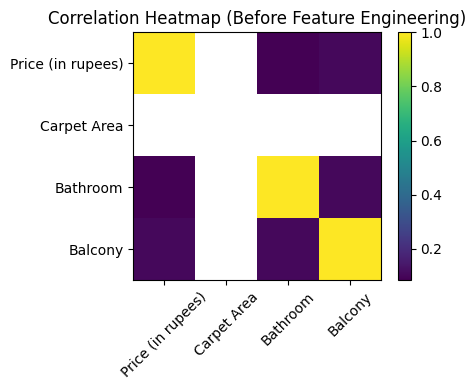

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(corr_features)), corr_features, rotation=45)
plt.yticks(range(len(corr_features)), corr_features)

plt.title("Correlation Heatmap (Before Feature Engineering)")
plt.tight_layout()
plt.show()

In [ ]:
df["Price_per_sqft"]=df["Price (in rupees)"]/df["Carpet Area"]

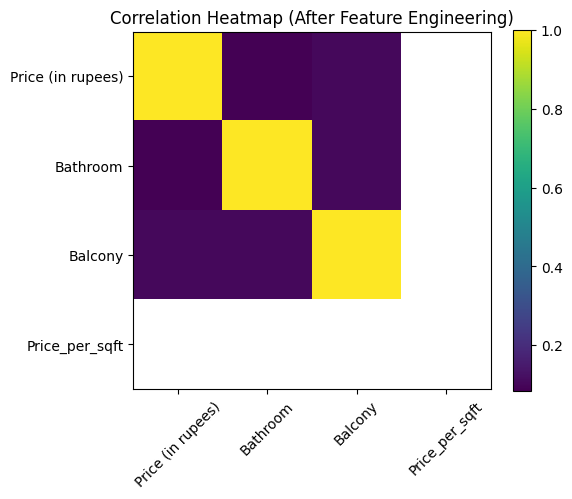

In [ ]:
# Select new features (after feature engineering)
new_corr_features = [
    "Price (in rupees)",
    "Bathroom",
    "Balcony",
    "Price_per_sqft"
]

# Convert 'Balcony' to numeric (if needed)
df["Balcony"] = pd.to_numeric(df["Balcony"], errors="coerce")

# Calculate correlation matrix
new_corr = df[new_corr_features].corr()

# Plot heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.imshow(new_corr)
plt.colorbar()

plt.xticks(range(len(new_corr_features)), new_corr_features, rotation=45)
plt.yticks(range(len(new_corr_features)), new_corr_features)

plt.title("Correlation Heatmap (After Feature Engineering)")
plt.tight_layout()
plt.show()

In [ ]:
merged_df=pd.get_dummies(
    merge_df,
    columns=["Transaction","Furnishing"],
    drop_first=True
)

In [ ]:
# NORMALISATION
# Jab data ke numbers ka scale alag-alag hota hai, tab normalization karte hain.
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
scaler = MinMaxScaler()

# Apply normalization on selected columns
merged_df[["Price (in rupees)", "Bathroom"]] = scaler.fit_transform(
    merged_df[["Price (in rupees)", "Bathroom"]]
)

In [ ]:
# Model implementation
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ensure 'Carpet Area' is numeric and fill NaNs before calculation
merged_df['Carpet Area'] = pd.to_numeric(merged_df['Carpet Area'], errors='coerce')
merged_df['Carpet Area'] = merged_df['Carpet Area'].fillna(merged_df['Carpet Area'].median())

# Ensure 'Balcony' is numeric and fill NaNs
merged_df['Balcony'] = pd.to_numeric(merged_df['Balcony'], errors='coerce')
merged_df['Balcony'] = merged_df['Balcony'].fillna(merged_df['Balcony'].median())

# Calculate Price_per_sqft
merged_df['Price_per_sqft'] = merged_df['Price (in rupees)'] / merged_df['Carpet Area']

In [ ]:
#
X = merged_df[[
    "Bathroom",
    "Balcony",
    "Price_per_sqft",
    "Furnishing_Semi-Furnished",
    "Furnishing_Unfurnished",
    "Transaction_Other",
    "Transaction_Rent/Lease",
    "Transaction_Resale"
]]

y = merged_df["Price (in rupees)"]

In [ ]:
X_train,